# Visualize the confidence of prediction
We use decision_function of SVC to plor the confidence of the prediction.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
#mpl.rcParams['xtick.labelsize'] = 8
#mpl.rcParams["image.cmap"] = 'gray'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

%matplotlib inline

In [2]:
data_df = pd.read_csv('data/XRF_ML_cr.csv', index_col=0)
info_df = pd.read_csv('data/info.cleaned.all.csv', index_col=0)

In [3]:
facies = ['shoreface', 'channel', 'beach-foreshore', 'sand flat', 'mud flat',
       'lagoon', 'peat', 'soil', 'eolian/fluvial (W)',
       'shallow marine', 'moraine', 'eolian/fluvial']

Facies = []
for fa in facies:
    Facies.append(fa.capitalize())

Facies

['Shoreface',
 'Channel',
 'Beach-foreshore',
 'Sand flat',
 'Mud flat',
 'Lagoon',
 'Peat',
 'Soil',
 'Eolian/fluvial (w)',
 'Shallow marine',
 'Moraine',
 'Eolian/fluvial']

## SVC model
The score produced by decision_function is selected as the representative of confidence. Choose VVC19-3, which has sediment facies (beach-foreshore for the whole section) that belongs to those ambiguous facies in Holocene shallow marine. In contrast, N72-3 is choosen because it has only moraine deposit, that is well classified by machine.

In [19]:
from joblib import load
#lr = load('models/roll_lr_model_20201120.joblib')
svc = load('models/roll_svc_model_20201120.joblib')
#rf = load('models/roll_rf_model_20201120.joblib')

In [20]:
dec_bf = svc.decision_function(data_df.loc[data_df.core_section == 'VVC19-3', data_df.columns[:-2]])
y_bf = data_df.loc[data_df.core_section == 'VVC19-3', 'facies_merge_2']
dec_bf.shape

(463, 12)

In [21]:
y_moraine = data_df.loc[data_df.core_section == 'N72-3', 'facies_merge_2'].values
dec_moraine = svc.decision_function(data_df.loc[data_df.core_section == 'N72-3', data_df.columns[:-2]].values)
dec_moraine.shape

(514, 12)

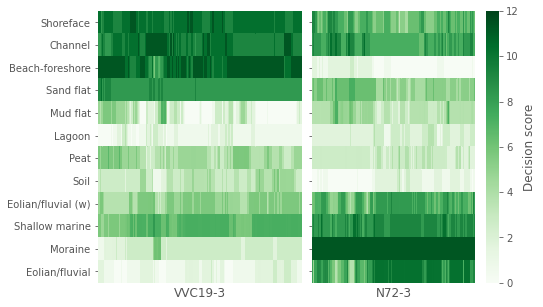

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 5), sharey='row')
sns.heatmap(dec_bf.T, cmap='Greens', yticklabels=Facies, vmax=12, vmin=0, xticklabels=False, ax=axes[0], cbar=False)
sns.heatmap(dec_moraine.T, cmap='Greens', yticklabels=Facies, vmax=12, vmin=0, xticklabels=False, ax=axes[1], 
            cbar_kws = {'label' : 'Decision score'})
axes[0].set_xlabel('VVC19-3')
axes[1].set_xlabel('N72-3')
plt.subplots_adjust(wspace=.05)
#fig.savefig('results/roll_svc_decision_function_{}.png'.format(date))

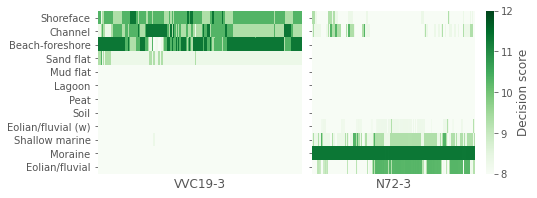

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 3), sharey='row')
sns.heatmap(dec_bf.T, cmap='Greens', yticklabels=Facies, vmax=12, vmin=8, xticklabels=False, ax=axes[0], cbar=False)
sns.heatmap(dec_moraine.T, cmap='Greens', yticklabels=Facies, vmax=12, vmin=8, xticklabels=False, ax=axes[1], 
            cbar_kws = {'label' : 'Decision score', 'ticks': [8, 9, 10, 11, 12]})
axes[0].set_xlabel('VVC19-3')
axes[1].set_xlabel('N72-3')
plt.subplots_adjust(wspace=.05)
fig.savefig('results/roll_svc_decision_function_{}.png'.format(date))

## SVC model with probability
I retrain the SVC model using the same paramters but set probibility as True to give ability to produce the "calibrated" probability.

In [5]:
from joblib import load
svc = load('models/roll_svc_prob_model_20210429.joblib')

In [16]:
pro_bf = svc.predict_proba(data_df.loc[data_df.core_section == 'VVC19-3', data_df.columns[:-2]])
y_bf = data_df.loc[data_df.core_section == 'VVC19-3', 'facies_merge_2']
y_moraine = data_df.loc[data_df.core_section == 'N72-3', 'facies_merge_2'].values
pro_moraine = svc.predict_proba(data_df.loc[data_df.core_section == 'N72-3', data_df.columns[:-2]].values)

In [10]:
pro_bf[0].sum()

1.0

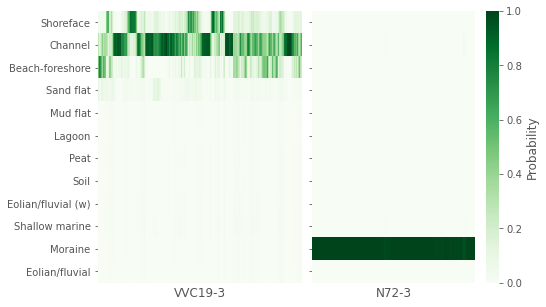

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 5), sharey='row')
sns.heatmap(pro_bf.T, cmap='Greens', yticklabels=Facies, vmax=1, vmin=0, xticklabels=False, ax=axes[0], cbar=False)
sns.heatmap(pro_moraine.T, cmap='Greens', yticklabels=Facies, vmax=1, vmin=0, xticklabels=False, ax=axes[1], 
            cbar_kws = {'label' : 'Probability'})
axes[0].set_xlabel('VVC19-3')
axes[1].set_xlabel('N72-3')
plt.subplots_adjust(wspace=.05)
fig.savefig('results/roll_svc_probability_{}.png'.format(date))

In [15]:
dec_bf = svc.decision_function(data_df.loc[data_df.core_section == 'VVC19-3', data_df.columns[:-2]])
y_bf = data_df.loc[data_df.core_section == 'VVC19-3', 'facies_merge_2']
y_moraine = data_df.loc[data_df.core_section == 'N72-3', 'facies_merge_2'].values
dec_moraine = svc.decision_function(data_df.loc[data_df.core_section == 'N72-3', data_df.columns[:-2]].values)

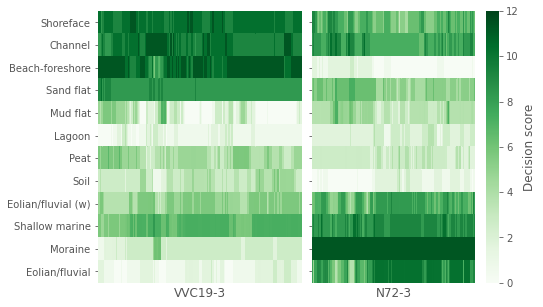

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 5), sharey='row')
sns.heatmap(dec_bf.T, cmap='Greens', yticklabels=Facies, vmax=12, vmin=0, xticklabels=False, ax=axes[0], cbar=False)
sns.heatmap(dec_moraine.T, cmap='Greens', yticklabels=Facies, vmax=12, vmin=0, xticklabels=False, ax=axes[1], 
            cbar_kws = {'label' : 'Decision score'})
axes[0].set_xlabel('VVC19-3')
axes[1].set_xlabel('N72-3')
plt.subplots_adjust(wspace=.05)
#fig.savefig('results/roll_svc_decision_function_{}.png'.format(date))

Well...the inconsistency between prediction and calibrated probability, mentioned by <https://scikit-learn.org/stable/modules/svm.html#scores-and-probabilities>, happens. Although the probability indicates clearly that the model is way more confident in classifying moraine deposit, the inconsistnecy makes this figure wrecked.

## RF model with probability

In [30]:
rf = load('models/roll_rf_model_20201123.joblib')

In [31]:
y_bf = data_df.loc[data_df.core_section == 'VVC19-3', 'facies_merge_2']
pro_bf = rf.predict_proba(data_df.loc[data_df.core_section == 'VVC19-3', data_df.columns[:-2]])
pro_bf.shape

(463, 12)

In [32]:
y_moraine = data_df.loc[data_df.core_section == 'N72-3', 'facies_merge_2'].values
pro_moraine = rf.predict_proba(data_df.loc[data_df.core_section == 'N72-3', data_df.columns[:-2]].values)
pro_moraine.shape

(514, 12)

In [32]:
pro_bf[0].sum()

1.0000000000000007

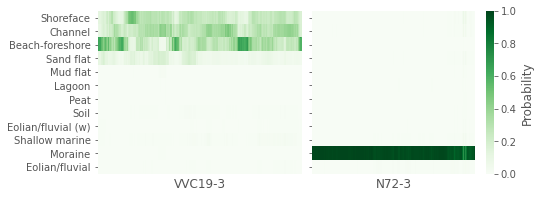

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 3), sharey='row')
sns.heatmap(pro_bf.T, cmap='Greens', yticklabels=Facies, vmax=1, vmin=0, xticklabels=False, ax=axes[0], cbar=False)
sns.heatmap(pro_moraine.T, cmap='Greens', yticklabels=Facies, vmax=1, vmin=0, xticklabels=False, ax=axes[1], 
            cbar_kws = {'label' : 'Probability'})
axes[0].set_xlabel('VVC19-3')
axes[1].set_xlabel('N72-3')
plt.subplots_adjust(wspace=.05)
fig.savefig('results/roll_rf_probability_{}.png'.format(date))

## Summary
The decision scores of these two core sections can't show the heuristic meaning that our SVC model are much more confident in classifying moraine deposit than beach-foreshore sediments. Our SVC model doesn't have predict_prob() to produce "calibrated" probability because during training the parameter, probability, was set to False. After retrain the SVC model, we are able to get probability. But the inconsistency between prediction and probability makes it wrecked. The decision score is still the sensible measure. In contrast, the RF model, which has predict_prob() in default, perfectly express the hearistic meaning. Remember, that is also "calibrated" probability.

BTW, the x-axis is the index of the data instead of the section depth. In order to asign correct section depth to compare with core photo, we need to do more about it.

## Curiosity

In [25]:
dec_mf = svc.decision_function(data_df.loc[data_df.core_section == 'N52-3', data_df.columns[:-2]])
y_mf = data_df.loc[data_df.core_section == 'N52-3', 'facies_merge_2']
dec_mf.shape

(557, 12)

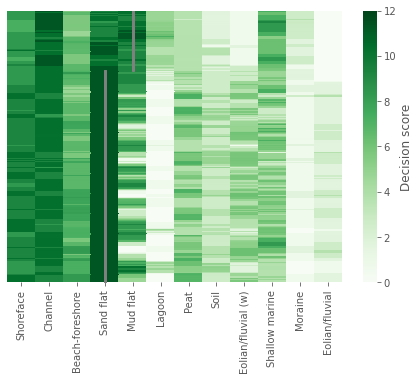

In [29]:
plt.figure(figsize=(7.5, 5))
sns.heatmap(dec_mf, cmap='Greens', xticklabels=Facies, vmax=12, vmin=0, yticklabels=False, 
            cbar_kws = {'label' : 'Decision score'})
plt.scatter(y_mf+.5, range(len(y_mf)), s=6, c='gray')
#plt.subplots_adjust(wspace=.05)
#fig.savefig('results/roll_svc_decision_function_{}.png'.format(date))